<a href="https://colab.research.google.com/github/tnichlani/Deep_Learning/blob/main/cv2_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Working with images in CV2**

In [34]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


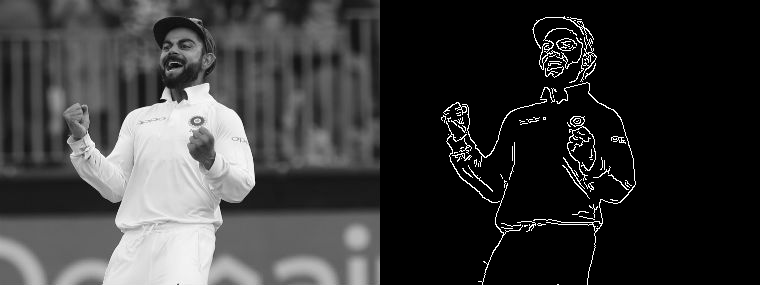

In [36]:
virat = cv2.imread('/content/gdrive/MyDrive/Colab/traffic/virat1.jpg', 0)
edges = cv2.Canny(virat, 100, 200)
both = np.concatenate((virat, edges), axis=1)
cv2_imshow(both)

In [37]:
# import the tesseract library
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


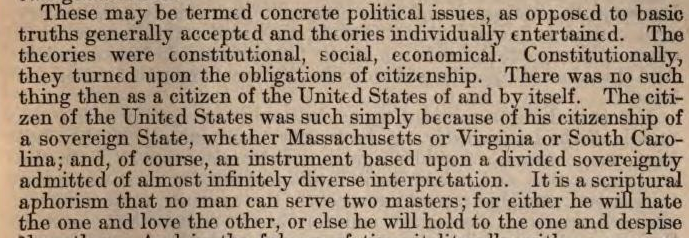

In [38]:
image = cv2.imread('/content/gdrive/MyDrive/Colab/traffic/image2.png')
cv2_imshow(image)

In [39]:
text = pytesseract.image_to_string(image)
print(text)

These may be termed concrete political issues, as opposed to basic
truths generally accepted and theories iateeadaaly entertained. The
theories were constitutional, social, economical. Constitutionally,
they turned upon the obligations of citizenship. There was no such
thing then as a citizen of the United States of and by itself. The citi-
zen of the United States was such simply because of his citizenship of
a sovereign State, whether Massachusetts or Virginia or South Caro-
lina; and, of course, an instrument based upon a divided sovereignty
admitted of almost infinitely diverse interpretation. It is a scriptural
aphorism that no man can serve two masters; for either he will hate
the one and love the other, or else he will hold to the one and despise

 



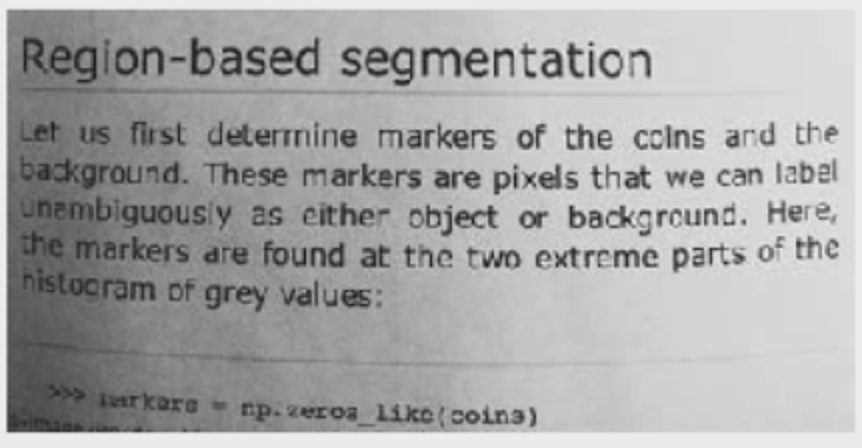

In [40]:
image2 = cv2.imread('/content/gdrive/MyDrive/Colab/traffic/text_bicubic_y.png')
cv2_imshow(image2)

In [41]:
text2 = pytesseract.image_to_string(image2)
print(text2)

  
 

line markers of the colns ard the

rs are pixels that we can label
Object or background. Here,
the two extreme parts of the



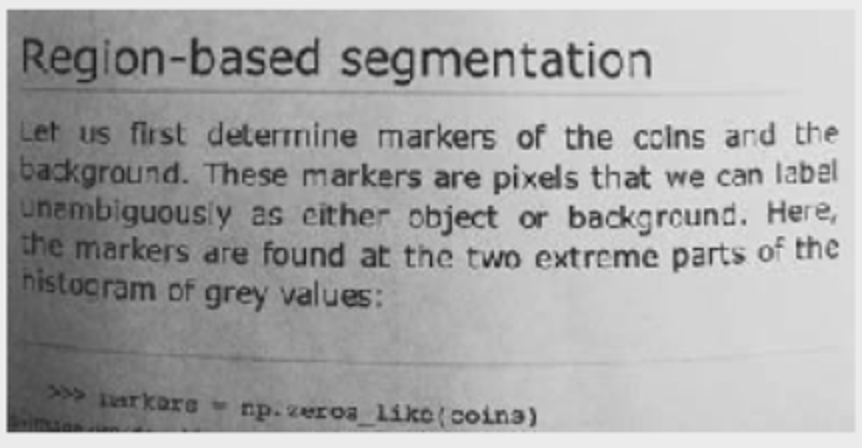

In [43]:
#convert to grayscale
gray= cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

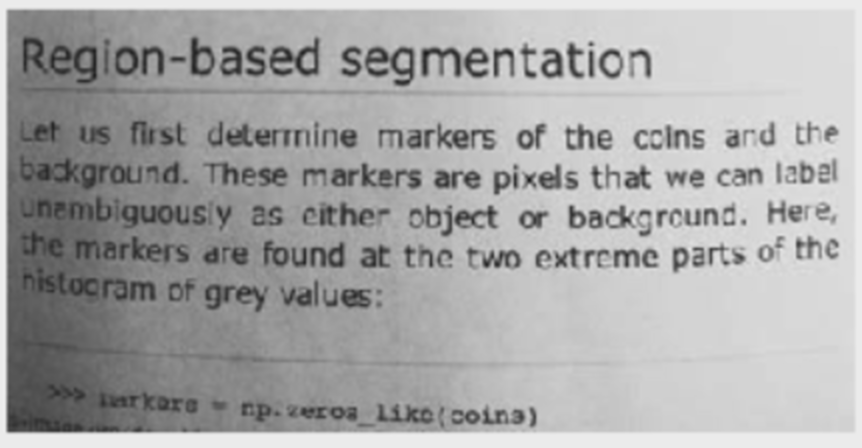

In [45]:
# smoothening 
# gaussian blur
gaussian = cv2.GaussianBlur(gray, (3,3),0)
cv2_imshow(gaussian)

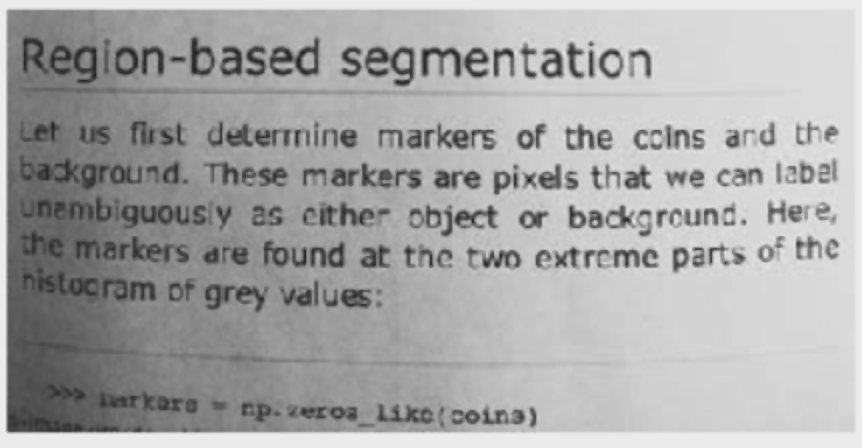

In [46]:
# median blur
median = cv2.medianBlur(gray,3)
cv2_imshow(median)

In [47]:
text_median = pytesseract.image_to_string(median)
print(text_median)

  
    
 

ae _ of the coins and the
are pixels that we can label
ther object or background. Here,
J i the two extreme parts of the



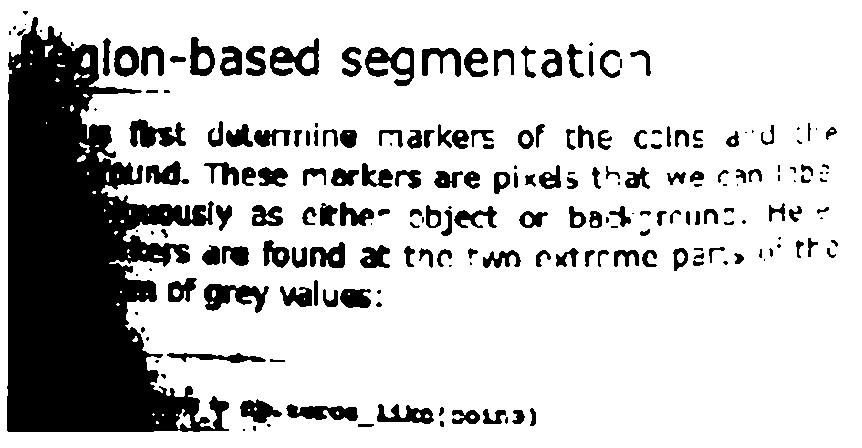

In [48]:
# thresholding 
# simple 
ret, simple_threshold = cv2.threshold(median, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(simple_threshold)

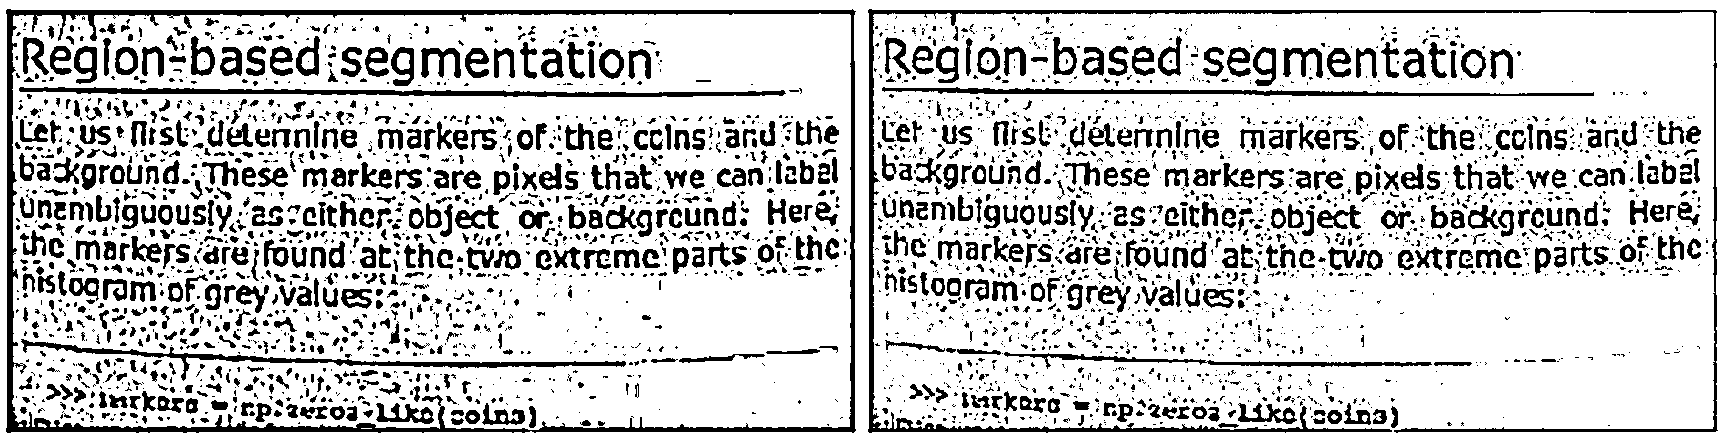

In [52]:
# adaptive thresholding
adaptive_threshold_mean = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
both_images = np.concatenate((adaptive_threshold_mean, adaptive_threshold_gaussian), axis=1)
cv2_imshow(both_images)

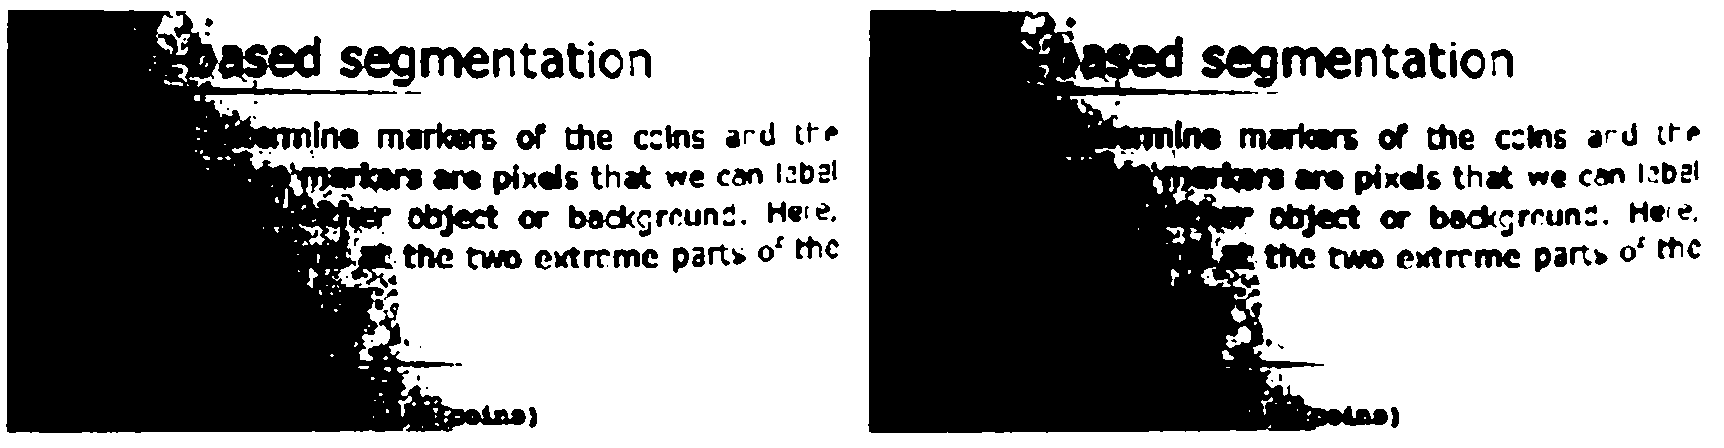

In [54]:
# Otsu's thresholding
ret2, otsu_threshold = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(median,(5,5),0)
ret3, otsu_gaussian_threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
together = np.concatenate((otsu_threshold, otsu_gaussian_threshold), axis=1)
cv2_imshow(together)

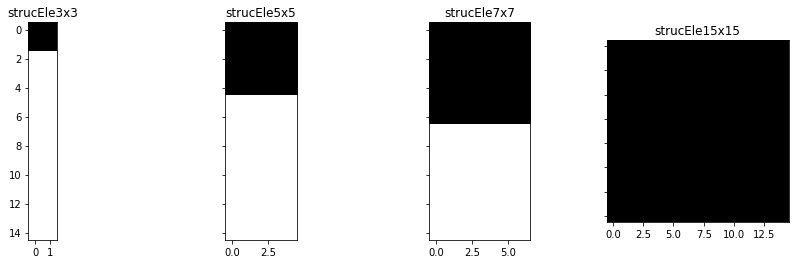

In [58]:
# morphological transformations

# plotting
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

# define elements
strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_image([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])

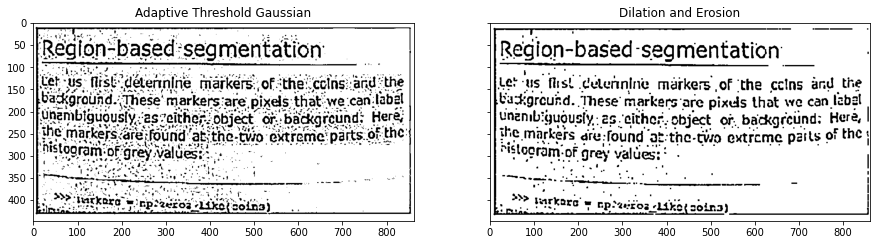

In [67]:
# dilate and erode X 2
for i in range(2):
  imgThresh = cv2.dilate(adaptive_threshold_gaussian, strucEle3x3, iterations = 2)
  imgThresh = cv2.erode(imgThresh, strucEle3x3, iterations = 2)

plot_image([adaptive_threshold_gaussian, imgThresh], cmap='gray', captions = ["Adaptive Threshold Gaussian", "Dilation and Erosion"])            

In [65]:
text3 = pytesseract.image_to_string(imgThresh)
print(text3)

   
   
  
   

Region-based ‘segmentation _
Ler: us. thst ‘Celennine markers of ‘the cclns and the
Uaxtground. These markers‘are pixels that we can [bal
Unanibs guously, 2s either, Object of. backgrelind: Hera,

the markers dre: found ‘ab-the-two extreme paits ¢ of the:
*itooram: “OF grey v valdess* .

  

. > 4 harkera’ Rptaetos ais noina)
Lee 7 EP wrliketsoin |



CONTOURS

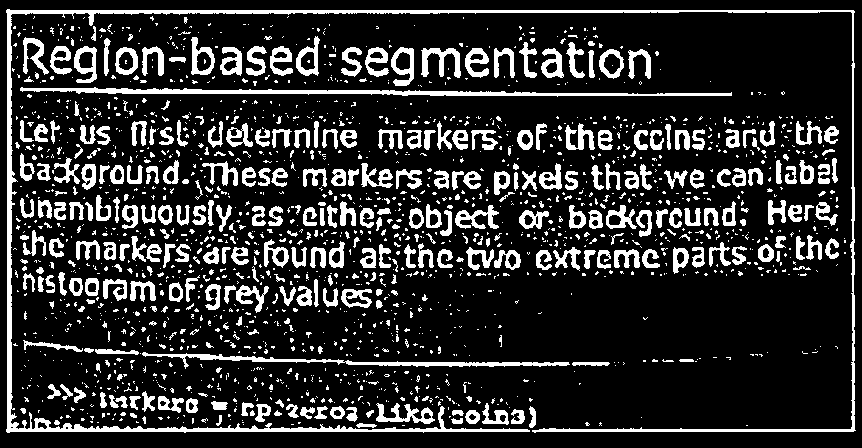

In [68]:
image_rev = cv2.bitwise_not(adaptive_threshold_gaussian)
cv2_imshow(image_rev)

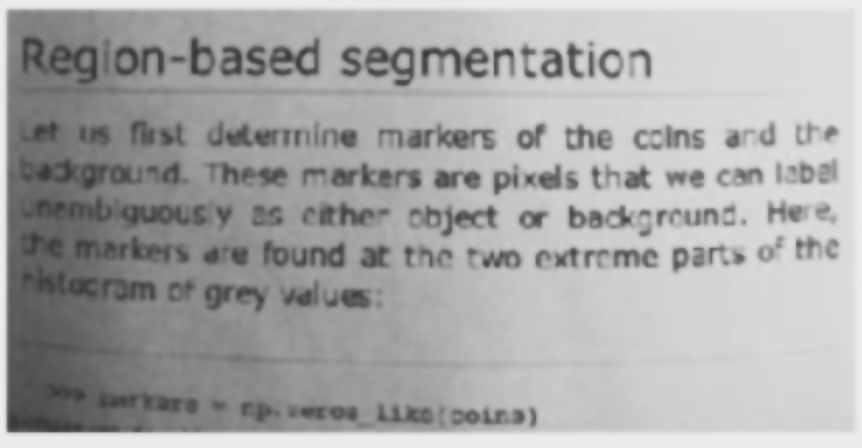

In [70]:
bilateral = cv2.bilateralFilter(gray,9, 75, 75)
cv2_imshow(bilateral)

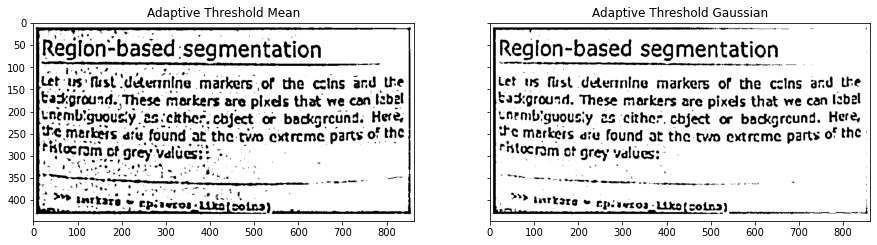

In [71]:
adaptive_threshold_mean = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap='gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])

In [72]:
text = pytesseract.image_to_string(adaptive_threshold_gaussian)

print(text)

 

Reglon-based segmentation _

Let us fist determine markers of the ccins and the

tadground. These markers are pixels that we can label

Lnembiguousiy 2s ‘cither, chject or backgreund. Here,

‘he markets ae found at the. tw extreme parts of the:
Prtocrom ot grey values:

ON 8 ae A eM be neat amntieee imine ee

>> bar :
. wrkata © epcawros-Liks soins)

